In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import minmax_scale

In [112]:
fruits = pd.read_excel('C:/Users/Rehme/OneDrive/Documents/DATA/fruits.xlsx')
fruits.shape

(60, 4)

In [113]:
fruits.head()

,Color,Sphericity,Weight,labels
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [115]:
X = fruits[['Sphericity','Weight']]
y = fruits['labels']
X = pd.DataFrame(minmax_scale(X),columns=['Sphericity','Weight'])
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=24)

In [116]:
def plot_pre_train():
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apples')
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Oranges')
    plt.scatter(x='Sphericity',y='Weight',data=X_test,c='blue',label='Test Samples',marker='*',s=100)
    plt.legend()
    plt.xlabel('Sphericity')
    plt.ylabel("Weight")
    plt.show()

def plot_post_train():
    y_predict = clf.predict(X_test)
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apples')
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Oranges')
    plt.scatter(x='Sphericity',y='Weight',data=X_test[y_test==y_predict],c='green',label='correctly classified',marker='*',s=100)
    plt.scatter(x='Sphericity',y='Weight',data=X_test[y_test!=y_predict],c='blue',label='Wrongly classified',marker='*',s=100)
    plt.legend()
    plt.xlabel('Sphericity')
    plt.ylabel("Weight")
    plt.show()

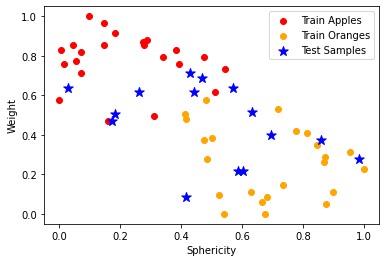

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25)
plot_pre_train()

In [118]:
x_test.count()

Sphericity    18
Weight        18
dtype: int64

In [119]:
clf = KNeighborsClassifier(n_neighbors=3,weights='uniform')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9333333333333333

C:\outsideapplications\anconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


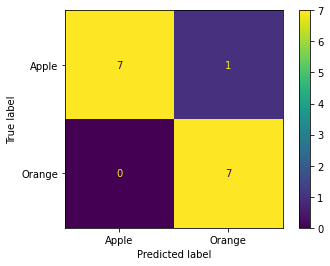

In [120]:
_ = plot_confusion_matrix(clf,X_test,y_test)

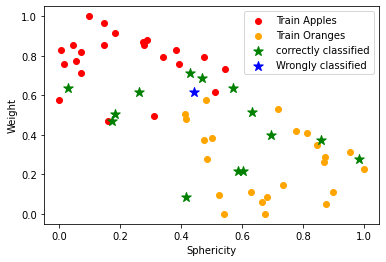

In [121]:
plot_post_train()